<h2> ======================================================</h2>
 <h1>MA477 - Theory and Applications of Data Science</h1> 
  <h1>Project 1: Linear Regression & KNN Regressor</h1> 
 
 <h4>Dr. Valmir Bucaj</h4>
 <br>
 United States Military Academy, West Point, AY20-2
<h2>=======================================================</h2>

<h2> Weight: <font color='red'>75pts</font</h2>
    
 <h2>Due Date: <font color='red'>Feb. 19th by COB</font</h2>

<hr style="height:3.2px;border:none;color:#333;background-color:#333;" />

<h3> Cadet Name:</h3>
<br>
<h3>Date: </h3>

<br>

<font color='red' size='3'> <b>$\dots \dots$</b> MY DOCUMENTATION IDENTIFIES ALL SOURCES USED AND ASSISTANCE RECEIVED IN THIS ASSIGNMENT
<br>

<b>$\dots \dots$ </b> I DID NOT USE ANY SOURCES OR ASSISTANCE REQUIRING DOCUMENATION IN COMPLETING THIS ASSIGNMENT</font>

<h3> Signature/Initials: </h3>

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

<h2>Description of Project</h2>

In this project you will be working with the `incurance` dataset contained in the folder. The `insurance` dataset contains information of different people, and based on this information how much the insurance compay charges them. The ultimate goal is to predict the insurance charges for new people based on the historical information collected about each person. The features that have been collected are: `age, sex, bmi, children, smoker,` and `region`. 

You are provided with two separate sets: `insurance_train` which you will use to train your model and `insurance_test` which you will use to generate the predictions. Once you generate the predictions, you should save the results on an excel file and submit that to me. 

The project will be broken into two main parts: The <b>Analysis</b> and <b> Best Model</b> portions.

<h3>Analysis</h3>

The <b>Analysis</b> portion is worth <b>45pts</b>.

For this portion of the project you will be evaluated on the overall analysis of the dataset.

The rough point breakdown is as follows:

<ul>
<li>A one or two pargraph explaining what the project is about, what are the results, and the methodology: <b>10pts</b></li>

<li>Thoroughly addressing all the questions and completing all the required tasks: <b>20pts </b></li>

<li> Creativity and quality of Python code and explanation of the step-by-step code/work:<b> 15pts</b></li>
</ul>

<h4>Tasks</h4>

<ul>
    <li> Data Preprocessing: Explain how you are handling the missing data, are you scaling the data and why?</li>
    
   <li> Conduct exploratory analysis, and briefly summarize your observations and findings. Exploring your data using a variety of visual tools counts as part of exploratory analysis.</li>
        
   <li> Explain how you handled each of the qualitative features. </li>
   
   <li> What model did you pick and why? At this stage only choose between KNN Regressor and Linear Regression</li>
   
   <li>Explain the type of relationship(linear vs. non-linear) between features and response variable, and how you came to your conclusions. </li>
   
   <li> Obtain a measure of your model's variability and prediction power. Explain your method and results.</li>
   
    
 </ul>

<h3>Best Model</h3>

The <b>Best Model</b> portion is worth <b>30pts</b>.

For this portion you will exclusively be evaluated on the predictive power of your model. In this portion you will be competing with the rest of your peers for the top score. The scores will be, roughly, distributed according to the following scheme:



There are two instances where there may be significant deviations from the above grading scheme:





<table>
  <tr>
    <th>Points</th>
    <th>Criteria</th>
     </tr>
  <tr>
    <td>28-30</td>
    <td>Highest R2 Score</td>
   
  </tr>
  <tr>
    <td>26-28</td>
    <td>.25 StDevs of highest R2 score</td>
    </tr>
    
   <tr>
    <td>24-26</td>
    <td>.5 StDevs of highest R2 score</td>
  </tr>
  
  <tr>
    <td>22-24</td>
    <td>.75 StDevs of highest R2 score</td>
  </tr>
  
  <tr>
    <td>19-22</td>
    <td>1.25 StDevs of highest R2 score</td>
  </tr>
  
  <tr>
    <td>17</td>
    <td>1.75 StDevs of highest R2 score</td>
  </tr>
  
  <tr>
    <td>15</td>
    <td>2.25 StDevs of highest R2 score</td>
  </tr>
  
   <tr>
    <td>7-10</td>
    <td> 2.25+ StDevs of highest R2 score</td>
  </tr>
  
</table>

<br>


<ul>
  <li> If a student's model achieves an R2 score that is at least as high as the R2 score achieved by the model build by the instructor, then you will automatically get a $30$</li>
  <li> If the highest R2 score by a student is signigicantly smaller than the R2 score achieved by the model built by the instructor, the insturctor reserves the right to assign a max score that is significantly lower than what is stated in the grading scheme above. In this situation the rest of the scores will also be adjusted accordingly.</li>
 </ul>
 
 <h3>How to Submit?</h3>
 
 All of your work should be done in a single JupyterNotebook. You will submit to me via email a total of two files. One will be the JupyterNotebook which contains your whole work. The second file should be an excel file containing ONLY the predictions of your model on the test set `insurance_test`.

<h2>Background</h2>

With Machine Learning, we can use data to make predictions. Two of these methods are K Nearest Neighborhood Regression and Linear Regression. In this project, I will use these two methods to predict the cost of insurance based on a person's age, gender, BMI index, number of children, whether they're a smoker, and what region they live in. To determine which method to use and which variables to use, we need to do some exploratory analysis on the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First, I downloaded the dataset and examined what kind of data we have

In [2]:
ins_t = pd.read_csv('insurance_train.csv')
ins_test = pd.read_csv('insurance_test.csv')

In [3]:
ins_t.head()

,age,sex,bmi,children,smoker,region,charges
0,52.0,female,24.130,1,yes,northwest,23887.66270
1,46.0,male,43.890,3,no,southeast,8944.11510
2,46.0,male,19.855,0,no,northwest,7526.70645
3,37.0,female,NaN,2,no,southwest,6311.95200
4,62.0,female,29.920,0,no,southeast,13457.96080


In [4]:
ins_t['region'].unique()

array(['northwest', 'southeast', 'southwest', 'northeast'], dtype=object)

<h2>Exploratory Analysis</h2>

It looks like there is some missing data in a few of the columns and there are three qualitative measures, so we will have to deal with these by converting the sex to 1 for males and 0 for females. Smokers will be 1 and nonsmokers will be 0. Finally, people in the northwest region will be 0, northest 1, southwest 2, and southeast will be 3.

In [5]:
def sex(x):
    if x == 'male':
        return(1)
    else:
        return(0)
    
def smoker(x):
    if x == 'yes':
        return(1)
    else:
        return(0)
    
def region(x):
    if x == 'northwest':
        return(0)
    elif x == 'northeast':
        return(1)
    elif x == 'southwest':
        return(2)
    else:
        return(3)

In [6]:
df = ins_t.copy()
df['sex'] = ins_t['sex'].apply(sex)
df['smoker'] = ins_t['smoker'].apply(smoker)
df['region'] = ins_t['region'].apply(region)
dfn = df.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,52.0,0,24.130,1,1,0,23887.66270
1,46.0,1,43.890,3,0,3,8944.11510
2,46.0,1,19.855,0,0,0,7526.70645
3,37.0,0,NaN,2,0,2,6311.95200
4,62.0,0,29.920,0,0,3,13457.96080


To deal with the missing data, first I am going to explore some of the qualities of the missing data. Like how much data is missing, and what range the data could be in.

In [7]:
df.shape

(1003, 7)

To find out if there is a missing data point in the column, I used this function to count them. I used the website https://stackoverflow.com/questions/944700/how-can-i-check-for-nan-values to find out whether a data point is missing or not using the 'isnan' method.

In [8]:
def cntna(x):
    tot = 0
    for n in x:
        if np.isnan(n) == True:
            tot += 1
    return(tot)

In [9]:
cntna(df['bmi'])

49

In [10]:
df['bmi'].min()

15.96

In [11]:
df['bmi'].max()

53.13

In [12]:
df['bmi'].mean()

30.630424528301866

In [13]:
df['bmi'].std()

6.175549778030273

In [14]:
cntna(df['age'])

86

In [15]:
df['age'].min()

18.0

In [16]:
df['age'].max()

64.0

In [17]:
df['age'].mean()

39.102508178844054

In [18]:
df['age'].std()

13.945557126596498

First, I'm going to just replace the missing data from the BMI and age columns with their averages.

In [19]:
def replacebmi(x):
    if np.isnan(x) == True:
        return(30.630)
    else:
        return(x)
    
def replaceage(x):
    if np.isnan(x) == True:
        return(39.0)
    else:
        return(x)

In [20]:
df['bmi'] = ins_t['bmi'].apply(replacebmi)
df['age'] = ins_t['age'].apply(replaceage)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,52.0,0,24.130,1,1,0,23887.66270
1,46.0,1,43.890,3,0,3,8944.11510
2,46.0,1,19.855,0,0,0,7526.70645
3,37.0,0,30.630,2,0,2,6311.95200
4,62.0,0,29.920,0,0,3,13457.96080


Looking at the plots after these changes, I realize that making all the missing data the average of their respective columns really skew the data, because there are a significant amout of data points at the average values.

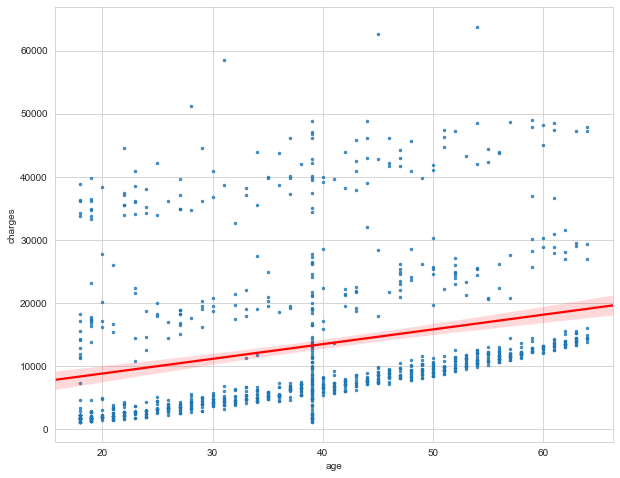

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.regplot(x='age',y='charges',data=df,scatter_kws={'s':6},line_kws={'color':'r'},ci=95)
plt.show()

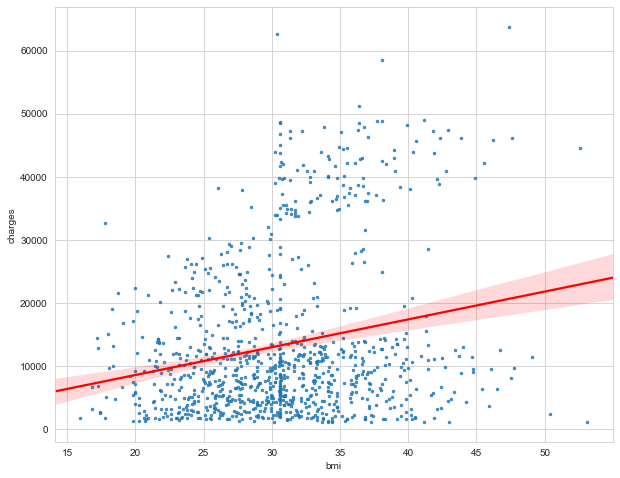

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.regplot(x='bmi',y='charges',data=df,scatter_kws={'s':6},line_kws={'color':'r'},ci=95)
plt.show()

To try something new, I came up with the idea to assign a random value for the missing data based on the distribution of the know values in the same columns. The new data depends on the average, range, and standard deviation of the known data. I used the website https://stackoverflow.com/questions/27831923/python-random-number-generator-with-mean-and-standard-deviation to come up with an array of random numbers within a certain distribution.

In [24]:
import scipy.stats as stats

a, b = 18, 64
mu, sigma = 39.1025, 13.3337
agedist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)

agevalues = agedist.rvs(86)

c, d = 15.96, 53.13
bmu, bsigma = 30.6304, 6.0226
bmidist = stats.truncnorm((c - bmu) / bsigma, (d - bmu) / bsigma, loc=bmu, scale=bsigma)

bmivalues = bmidist.rvs(49)

I used these functions to change the replace the missing data with a new value from the distribution.

In [25]:
import random as ran

In [26]:
def replacebmi2(x):
    if np.isnan(x) == True:
        return(bmivalues[ran.randint(0, 48)])
    else:
        return(x)

def replaceage2(x):
    if np.isnan(x) == True:
        return(agevalues[ran.randint(0, 85)])
    else:
        return(x)

In [27]:
dfn['bmi'] = ins_t['bmi'].apply(replacebmi2)
dfn['age'] = ins_t['age'].apply(replaceage2)
dfn.head()

,age,sex,bmi,children,smoker,region,charges
0,52.0,0,24.130000,1,1,0,23887.66270
1,46.0,1,43.890000,3,0,3,8944.11510
2,46.0,1,19.855000,0,0,0,7526.70645
3,37.0,0,37.501096,2,0,2,6311.95200
4,62.0,0,29.920000,0,0,3,13457.96080


After I made these changes, the plots looked more natural and I could begin looking to see if there is a relationship between the variables and the insurance charge. The two most obvious linear relationships are with age and charges and with smokers and charges, so these two variables are the ones I used in creating my first model. There doesn't seem to be any other relationships other than linear relationships because there doesn't look like the data follows a quadratic equation.

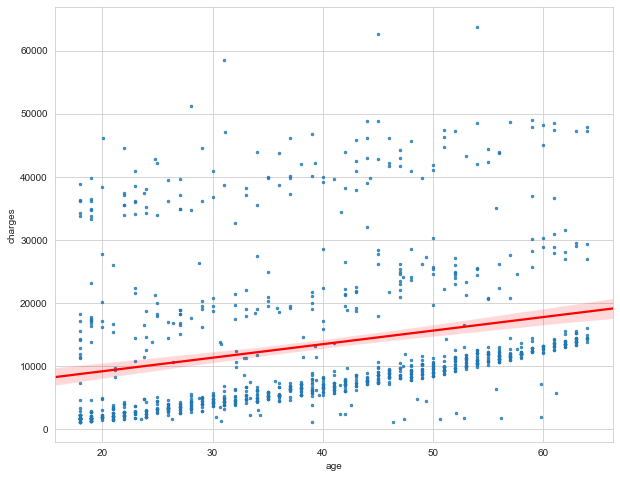

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.regplot(x='age',y='charges',data=dfn,scatter_kws={'s':6},line_kws={'color':'r'},ci=95)
plt.show()

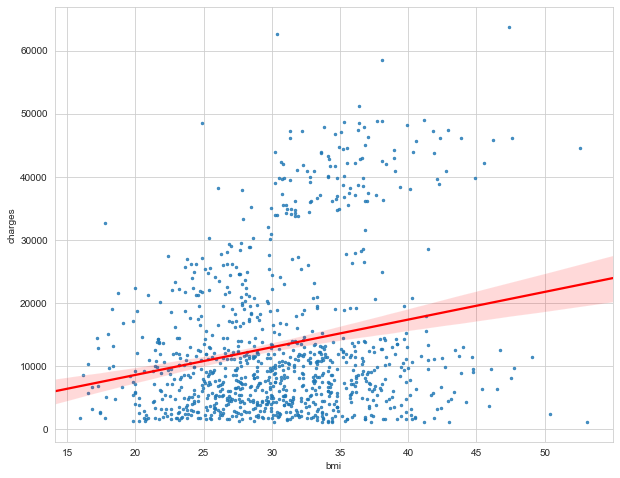

In [29]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.regplot(x='bmi',y='charges',data=dfn,scatter_kws={'s':6},line_kws={'color':'r'},ci=95)
plt.show()

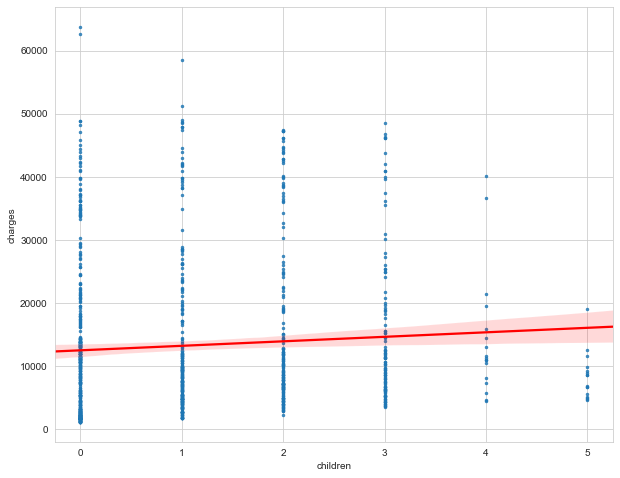

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.regplot(x='children',y='charges',data=dfn,scatter_kws={'s':6},line_kws={'color':'r'},ci=95)
plt.show()

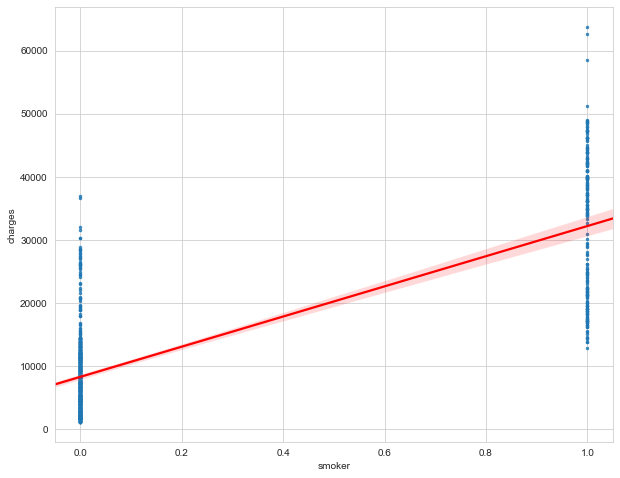

In [31]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.regplot(x='smoker',y='charges',data=dfn,scatter_kws={'s':6},line_kws={'color':'r'},ci=95)
plt.show()

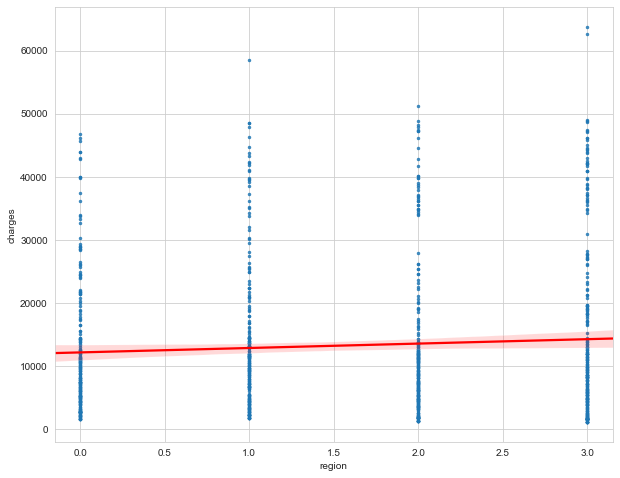

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.regplot(x='region',y='charges',data=dfn,scatter_kws={'s':6},line_kws={'color':'r'},ci=95)
plt.show()

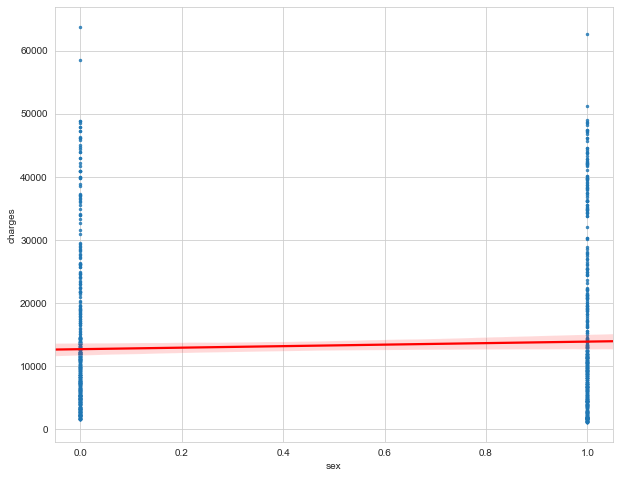

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.regplot(x='sex',y='charges',data=dfn,scatter_kws={'s':6},line_kws={'color':'r'},ci=95)
plt.show()

I created a new dataframe with only the smoker and age variables.

In [34]:
dfn.head()

,age,sex,bmi,children,smoker,region,charges
0,52.0,0,24.130000,1,1,0,23887.66270
1,46.0,1,43.890000,3,0,3,8944.11510
2,46.0,1,19.855000,0,0,0,7526.70645
3,37.0,0,37.501096,2,0,2,6311.95200
4,62.0,0,29.920000,0,0,3,13457.96080


In [35]:
dff = dfn.drop(['sex','bmi','children','region'],axis=1)

In [36]:
dff.head()

,age,smoker,charges
0,52.0,1,23887.66270
1,46.0,0,8944.11510
2,46.0,0,7526.70645
3,37.0,0,6311.95200
4,62.0,0,13457.96080


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
X=dff.drop('charges',axis=1)
y=dff['charges']

In [39]:
X.head()

,age,smoker
0,52.0,1
1,46.0,0
2,46.0,0
3,37.0,0
4,62.0,0


Before I begin creating each of the models, I am scaling the data because each of the variables are measured on different scales and it is important to elimainate the false effect that having larger or smaller distances between data points has when using machine learning to create a model.

In [40]:
scaler=StandardScaler()

In [41]:
scaled=scaler.fit_transform(X)

In [42]:
X_sc=pd.DataFrame(scaled,columns=X.columns,index=X.index)

In [43]:
X_sc.head()

,age,smoker
0,0.945993,1.949113
1,0.507693,-0.513054
2,0.507693,-0.513054
3,-0.149757,-0.513054
4,1.676493,-0.513054


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25, random_state=101)

In [46]:
X_train.head()

,age,smoker
951,0.726843,-0.513054
421,-0.953308,1.949113
205,-1.464658,-0.513054
231,-0.076707,-0.513054
147,0.215493,-0.513054


In [47]:
from sklearn.neighbors import KNeighborsRegressor

In [48]:
from sklearn.metrics import r2_score, mean_squared_error

The first method I used was KNN Regression. Here, I tuned the model to see which K value would yield the highest R2 score. The R2 score gives us a measure for the prediction power of our model. The closer it is to 1, the better. The variablilty of the model can be seen by looking at the consistency of the R2 scores. Since they aren't all over the place, we can conclude that the model has good variability.

In [49]:
knn_r2scores=[]

for i in range(1,100):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    r2=r2_score(y_test,pred)
    knn_r2scores.append(r2)

Text(0, 0.5, 'R2 Score')

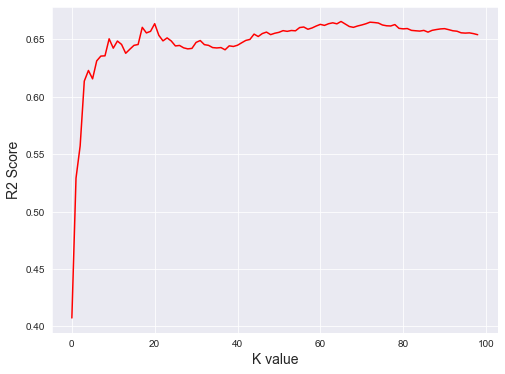

In [50]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
plt.plot(knn_r2scores,c='r')
plt.xlabel("K value",fontsize=14)
plt.ylabel("R2 Score",fontsize=14)

It looks like a K value of 20 would give us the best R2 score.

Next, I used linear regression to come up with a new model.

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lg=LinearRegression()

In [53]:
lg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
lg.intercept_

13228.5904068862

In [55]:
lg.coef_

array([3318.7620609 , 9915.99295498])

In [56]:
lg_pred=lg.predict(X_test)

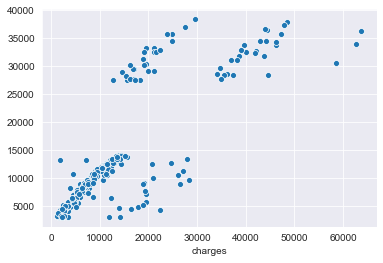

In [57]:
sns.scatterplot(y_test,lg_pred)

In [58]:
lg_r2=r2_score(y_test,lg_pred)
mse=mean_squared_error(y_test,lg_pred)

The R2 score that I got using this method was worse than the R2 score usign KNN.

In [59]:
lg_r2

0.683792113646559

In [60]:
mse

48472222.7718346

I wanted to see if the data was truly linear, so I plotted the distribution of the error from the model. Under the assumptions of linear regression, the error is normally distributed. If the model is not linear, then the error will not be normally distributed. From the plot below, the error looks pretty normally distributed other than the humps on either side of the curve.

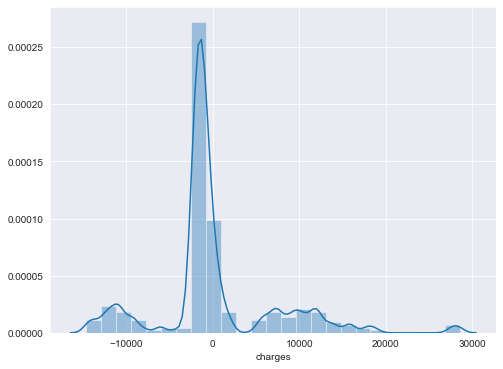

In [61]:
plt.figure(figsize=(8,6))
sns.distplot((y_test-lg_pred), bins=25)

I wanted to see if I would get a better R2 score using all the variables that were collected. The results show that we would indeed get a better R2 score for both KNN and linear regression.

In [62]:
dff2 = dfn.copy()

In [63]:
X2=dff2.drop('charges',axis=1)
y2=dff2['charges']

In [64]:
scaled2=scaler.fit_transform(X2)

In [65]:
X2_sc=pd.DataFrame(scaled2,columns=X2.columns,index=X2.index)

In [66]:
X2_sc.head()

,age,sex,bmi,children,smoker,region
0,0.945993,-0.987122,-1.063596,-0.069439,1.949113,-1.408917
1,0.507693,1.013046,2.159785,1.588841,-0.513054,1.269183
2,0.507693,1.013046,-1.760963,-0.898580,-0.513054,-1.408917
3,-0.149757,-0.987122,1.117585,0.759701,-0.513054,0.376483
4,1.676493,-0.987122,-0.119093,-0.898580,-0.513054,1.269183


In [67]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2_sc,y2,test_size=0.25, random_state=101)

In [68]:
knn2_r2scores=[]

for i in range(1,100):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X2_train,y2_train)
    pred=knn.predict(X2_test)
    r2=r2_score(y2_test,pred)
    knn2_r2scores.append(r2)

Text(0, 0.5, 'R2 Score')

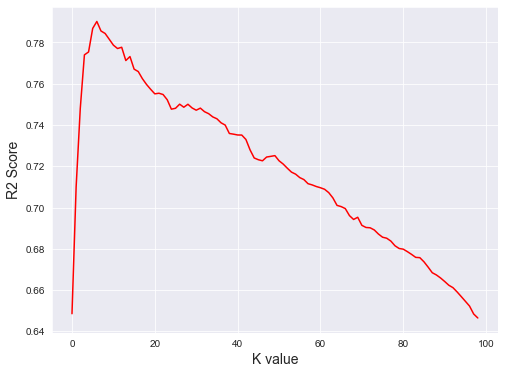

In [69]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
plt.plot(knn2_r2scores,c='r')
plt.xlabel("K value",fontsize=14)
plt.ylabel("R2 Score",fontsize=14)

The best R2 score I got with KNN was around 0.79 and the best I got with linear regression was 0.72. It seems like KNN would be the best method to use because it has consistently had a better R2 score than linear regression.

In [70]:
lg.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
lg.coef_

array([3246.14719602,  -85.31624187, 2080.3979802 ,  742.06822442,
       9872.54109244, -651.28661001])

In [72]:
lg2_pred=lg.predict(X2_test)

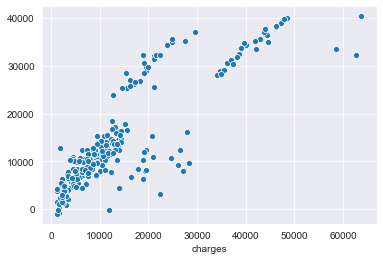

In [73]:
sns.scatterplot(y2_test,lg2_pred)

In [74]:
lg2_r2=r2_score(y2_test,lg2_pred)
mse=mean_squared_error(y2_test,lg2_pred)

In [75]:
lg2_r2

0.7292688679642857

In [76]:
mse

41500988.146253765

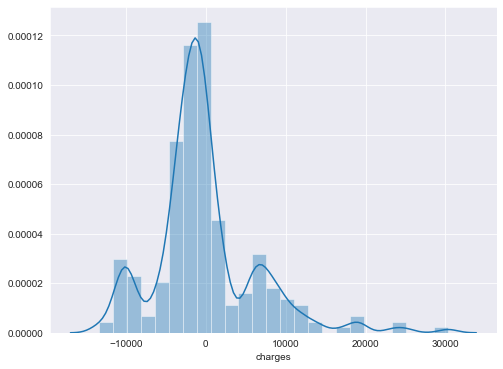

In [77]:
plt.figure(figsize=(8,6))
sns.distplot((y2_test-lg2_pred), bins=25)

Another method that we could use is a shrinkage method called ridge regression where we constrain the estimated coefficients.

In [78]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import Ridge, Lasso, LinearRegression

In [79]:
X2_sc.head()

,age,sex,bmi,children,smoker,region
0,0.945993,-0.987122,-1.063596,-0.069439,1.949113,-1.408917
1,0.507693,1.013046,2.159785,1.588841,-0.513054,1.269183
2,0.507693,1.013046,-1.760963,-0.898580,-0.513054,-1.408917
3,-0.149757,-0.987122,1.117585,0.759701,-0.513054,0.376483
4,1.676493,-0.987122,-0.119093,-0.898580,-0.513054,1.269183


In [80]:
ridge=Ridge(alpha=1.25)

In [81]:
kf=KFold(n_splits=5,shuffle=True, random_state=101)

In [82]:
cv_ridge=cross_validate(estimator=ridge,X=X2_sc,y=y2,cv=kf, return_estimator=True,
                        scoring={'r2','neg_mean_squared_error'})

In [83]:
import sklearn

In [84]:
cv_ridge['test_r2']

array([0.74411044, 0.70164351, 0.711846  , 0.80142998, 0.76137929])

In [85]:
cv_ridge['test_r2'].mean()

0.7440818435737596

When we cross validate the ridge method, the average R2 score was 0.74, which is worse than what we got with KNN.

The final regression method that I wanted to use was KNN with fewer of the variables, so I fit the KNN model using only age, BMI, and smoker. The K value of 9 gave us the highest R2 score we had, so I decided to go with this to predict the charges from the insurance test dataset.

In [86]:
dff3 = dfn.copy()

In [87]:
X3=dff3.drop(['charges','sex','children','region'],axis=1)
y3=dff3['charges']

In [88]:
scaled3=scaler.fit_transform(X3)

In [89]:
X3_sc=pd.DataFrame(scaled3,columns=X3.columns,index=X3.index)

In [90]:
X3_sc.head()

,age,bmi,smoker
0,0.945993,-1.063596,1.949113
1,0.507693,2.159785,-0.513054
2,0.507693,-1.760963,-0.513054
3,-0.149757,1.117585,-0.513054
4,1.676493,-0.119093,-0.513054


In [91]:
X3_train,X3_test,y3_train,y3_test=train_test_split(X3_sc,y3,test_size=0.25, random_state=101)

In [92]:
knn3_r2scores=[]

for i in range(1,100):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X3_train,y3_train)
    pred=knn.predict(X3_test)
    r2=r2_score(y3_test,pred)
    knn3_r2scores.append(r2)

Text(0, 0.5, 'R2 Score')

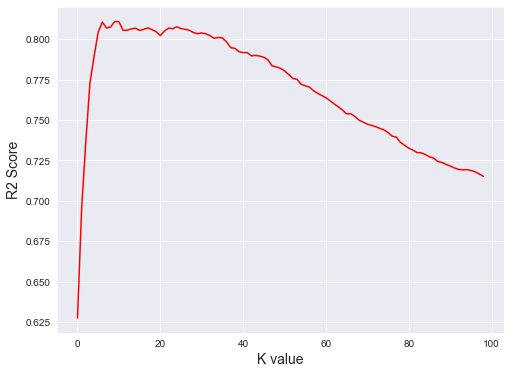

In [93]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
plt.plot(knn3_r2scores,c='r')
plt.xlabel("K value",fontsize=14)
plt.ylabel("R2 Score",fontsize=14)

In [94]:
knn=KNeighborsRegressor(n_neighbors=9)
knn.fit(X3_train,y3_train)
pred=knn.predict(X3_test)
r2=r2_score(y3_test,pred)
mse=mean_squared_error(y3_test,pred)

In [95]:
r2

0.8075059209289396

In [96]:
mse

29507853.174042284

Interpreting the test MSE value is harder, but essentially, we want it to be as small as possible.

Now, I used the last KNN regressor to predict the values of the charges for the insurance test dataset and then exported them in an excel document.

In [97]:
ins_test.head()

,age,sex,bmi,children,smoker,region
0,59,male,26.400,0,no,southeast
1,59,female,31.350,0,no,northwest
2,52,female,37.400,0,no,southwest
3,46,male,33.345,1,no,northeast
4,19,female,28.900,0,no,southwest


In [98]:
df_test = ins_test.copy()
df_test = df_test.drop(['sex','children','region'],axis=1)
df_test['smoker'] = ins_test['smoker'].apply(smoker)
df_test.head()

,age,bmi,smoker
0,59,26.400,0
1,59,31.350,0
2,52,37.400,0
3,46,33.345,0
4,19,28.900,0


In [99]:
cntna(df_test['bmi'])

0

In [100]:
cntna(df_test['age'])

0

In [101]:
scaled_test=scaler.fit_transform(df_test)

In [102]:
X_sc_test = pd.DataFrame(scaled_test,columns=df_test.columns,index=df_test.index)

In [103]:
X_sc_test.head()

,age,bmi,smoker
0,1.398014,-0.708632,-0.490653
1,1.398014,0.132908,-0.490653
2,0.897885,1.161458,-0.490653
3,0.469204,0.472075,-0.490653
4,-1.459864,-0.283612,-0.490653


In [104]:
test_pred=knn.predict(X_sc_test)

In [105]:
test_predictions=pd.DataFrame(test_pred)

In [159]:
test_predictions.to_excel('Project 1 Predictions.xlsx')

<font size=5 color='red'>Instructor Comments: </font>
    
    Overall it was well written and the flow was good! The analysis was pretty thorough and the model tuning was good as well. I would have liked to see a bit more visual data exploration (e.g. some boxplots etc.). A brief conclusion would help as well.
    
<font size=5 color='red'>Total Score:
        
        Analysis: 44/45
        
        Best Model: 30/30

</font>